In [37]:
#importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn


In [38]:
# Read the file that stored in data_sets folder 
df = pd.read_csv(r'S:\zenspaces\zen_hands_on_projects\Machine_Learning_Projects_ML\P01_Customer_Segmentation\data_sets\raw\Mall_Customers.csv') # load dataset into DataFrame
df.head() # display table with header with few rows



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
# Renaming the column as "Gender"
df.rename(columns={'Genre':'Gender'},inplace=True) # inplace=True modifies the original DataFrame
df.head() # display first few rows with headers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
# returns the number of rows and columns in a DataFrame.
df.shape

(200, 5)

In [41]:
# summary statistics of numeric columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
# Checking the datatypes assigned in each columns of csv data
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [43]:
# counts missing (NaN) values in each column
df.isnull().sum()

# isnull() checks whether a value is missing (NaN)
# sum() counts how many missing values are there per column
# Combined, it gives column-wise null count

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
# drop CustomerID column from the DataFrame
df.drop(['CustomerID'], axis=1, inplace=True)

# drop() removes rows or columns
# ["CustomerID"] → column to remove
# axis=1 → column axis
# inplace=True → change original DataFrame

In [45]:

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [46]:
df.columns = df.columns.str.strip()  # remove extra spaces
# processed_path = "../data/processed/customers_segment_cleaned.csv"
# df.to_csv(processed_path, index=False)


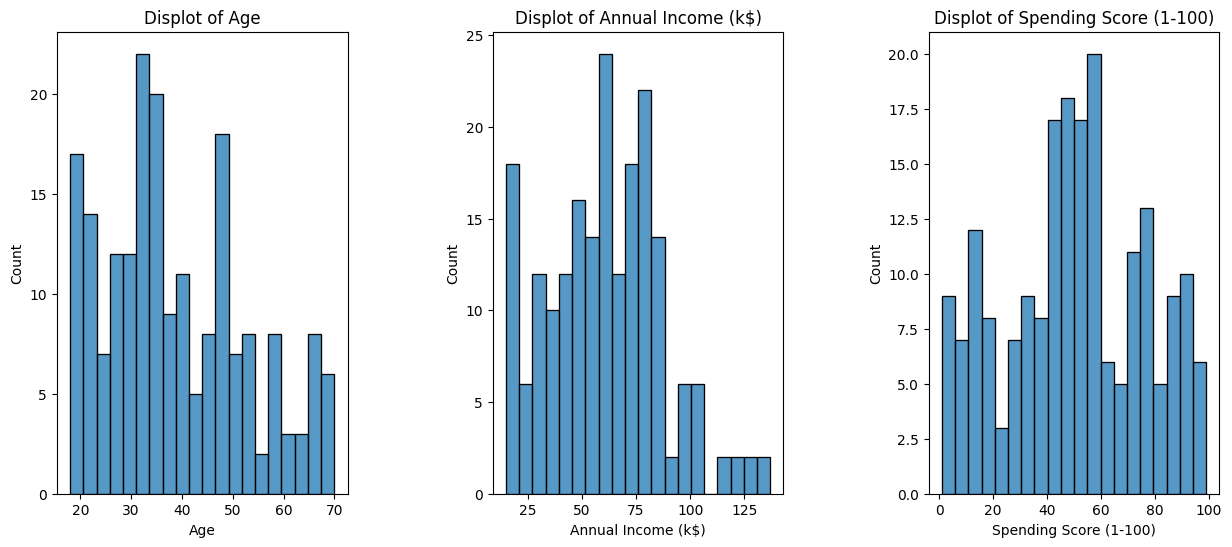

In [47]:
# visualize the distribution of Age, Income, and Spending Score using histograms

plt.figure(1, figsize=(15, 6)) # create a figure window with width 15 and height 6 inches
n=0 # initialize counter for subplot position
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']: # loop through selected numerical columns for visualization
    n += 1 # increment subplot index for each variable
    plt.subplot(1,3,n)   # create a subplot with 1 row, 3 columns, and select nth plot
    plt.subplots_adjust(hspace=0.25, wspace=0.5)  # adjust spacing between subplots vertically and horizontally
    sbn.histplot(df[x], bins=20)  # plot histogram for the current column with 20 bins
    plt.title('Displot of {}'.format(x))  # set title for the current subplot
plt.show()  # display all plots together

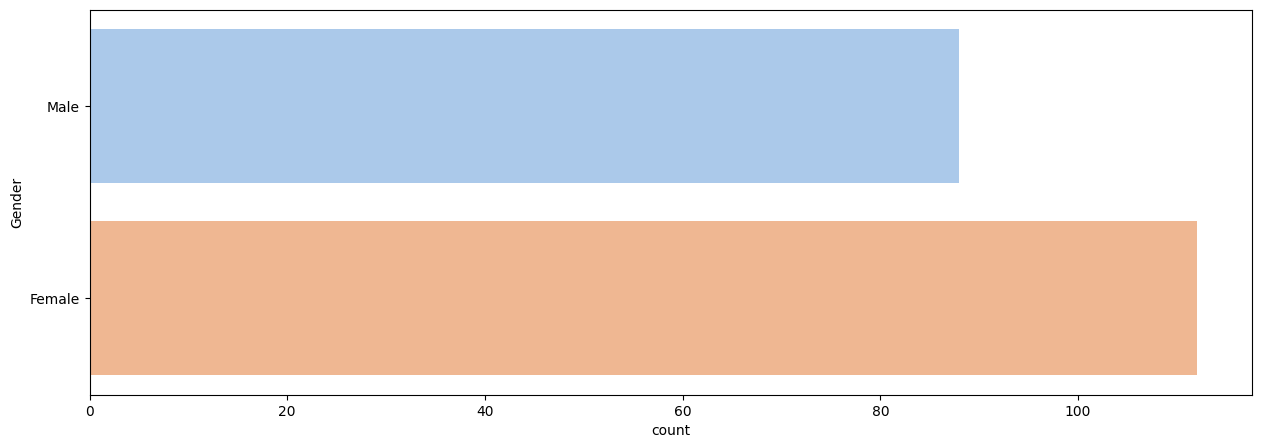

In [48]:
# visualize the number of male and female customers in the dataset using a horizontal bar chart

plt.figure(figsize=(15,5))
# sbn.countplot(y='Gender', data=df, palette='pastel')
sbn.countplot(y='Gender', data=df, hue='Gender', palette='pastel', legend=False)
plt.show()

# Note :
# visualize the number of male and female customers using a horizontal bar chart with pastel colors, avoiding future warnings

In [49]:
print(df.columns.tolist())

['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


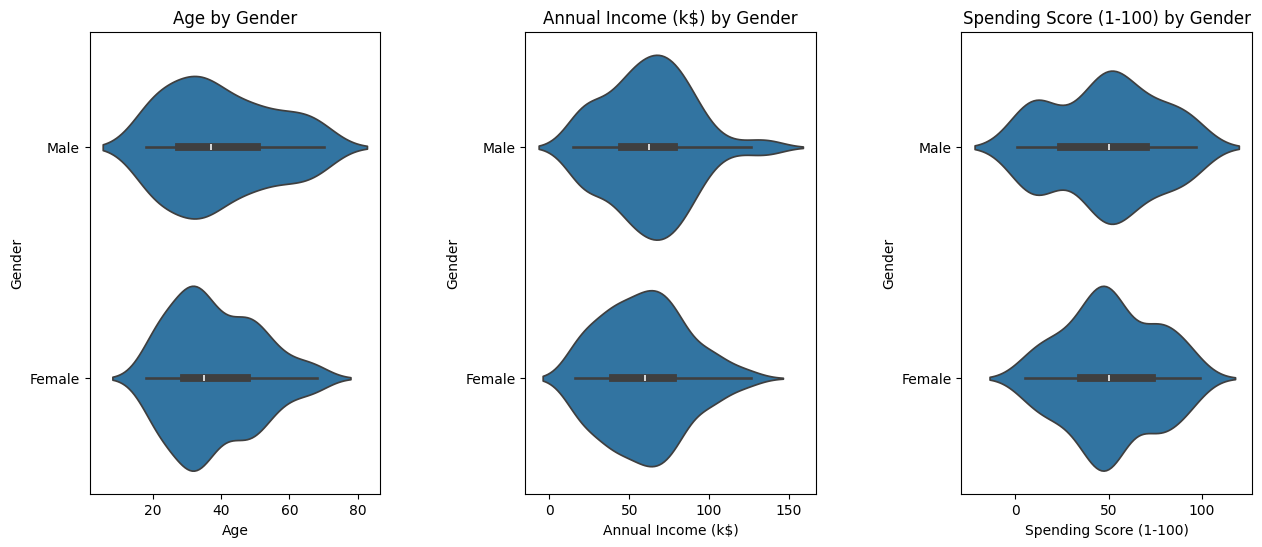

In [50]:
# visualize the distribution of Age, Annual Income, and Spending Score for each gender using violin plots

plt.figure(1, figsize=(15,6)) # # create a figure window with width 15 inches, height 6 inches, figure number 1

v=0 # initialize a counter to track subplot position
for x in ['Age','Annual Income (k$)', 'Spending Score (1-100)']: # loop through the selected numerical columns to plot
    v += 1  # increment subplot index for each iteration
    plt.subplot(1, 3, v)  # create a subplot layout with 1 row, 3 columns, and select the nth subplot

    # plt.set_style("darkgrid") # set Seaborn plot style to dark grid (for better aesthetics)

    plt.subplots_adjust(hspace=0.5, wspace=0.5) # adjust the spacing between subplots vertically and horizontally

    # create a violin plot of the current column 'x' grouped by 'Gender'
    # shows distribution of values for each gender
    sbn.violinplot(x=x,y='Gender',data=df) 
    
    plt.title(f"{x} by Gender") # set the title dynamically based on the current column

plt.show()


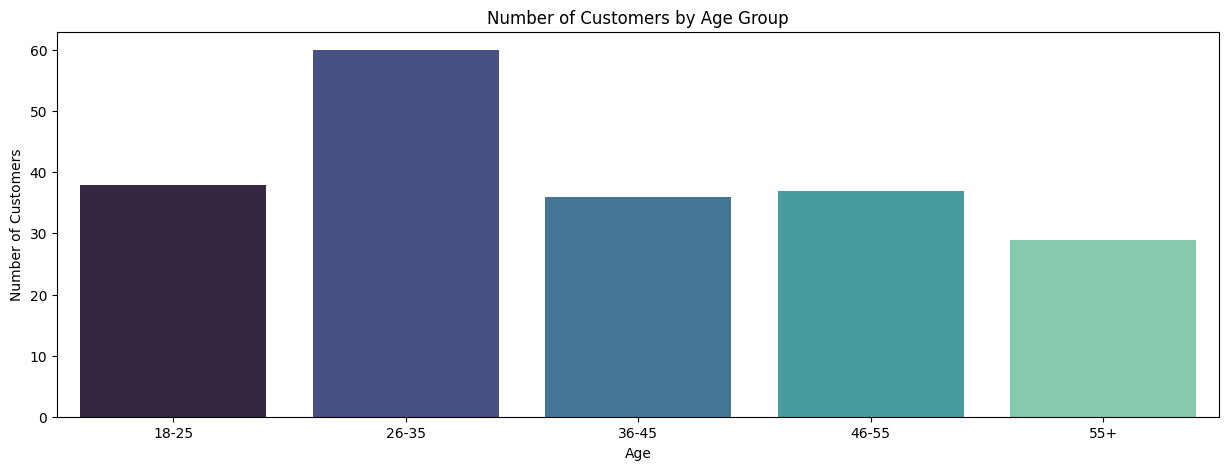

In [51]:
# visualize the distribution of customers across age groups using a bar chart with pastel/mako colors

age_18_25 = df.Age [(df.Age >= 18) & (df.Age <= 25)] # select Age values between 18 and 25
age_26_35 = df.Age [(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age [(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age [(df.Age >= 46) & (df.Age <= 55)]
age_55_Above = df.Age [(df.Age >= 56)]  # select Age value 56 and above

# create a DataFrame with AgeGroup labels and number of customers in each group
age_counts = pd.DataFrame({
    "AgeGroup": ["18-25","26-35","36-45","46-55","55+"],
    "Count": [len(age_18_25), len(age_26_35), len(age_36_45), len(age_46_55), len(age_55_Above)]
})

plt.figure(figsize = (15,5))
# sbn.barplot(data = age_counts, x = "AgeGroup", y = "Count", palette = "mako")
sbn.barplot(data=age_counts, x="AgeGroup", y="Count", hue="AgeGroup", palette="mako", legend=False)
plt.title("Number of Customers by Age Group")
plt.xlabel('Age') # set the x-axis label
plt.ylabel('Number of Customers') # set the y-axis label

plt.show()

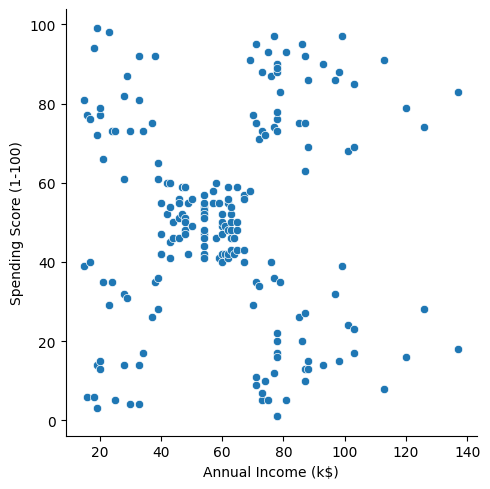

In [52]:
# visualize the relationship between customer income and spending score using a scatter plot

sbn.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

# create a scatter plot showing the relationship between Annual Income and Spending Score
# 'x' is Annual Income column
# 'y' is Spending Score column
# 'data=df' specifies the DataFrame to use
# relplot is short for "relationship plot"; defaults to scatter plot for two continuous variables

C:\Users\anand\AppData\Local\Temp\ipykernel_14300\1990101258.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(x=aix, y=aiy, palette="Spectral")


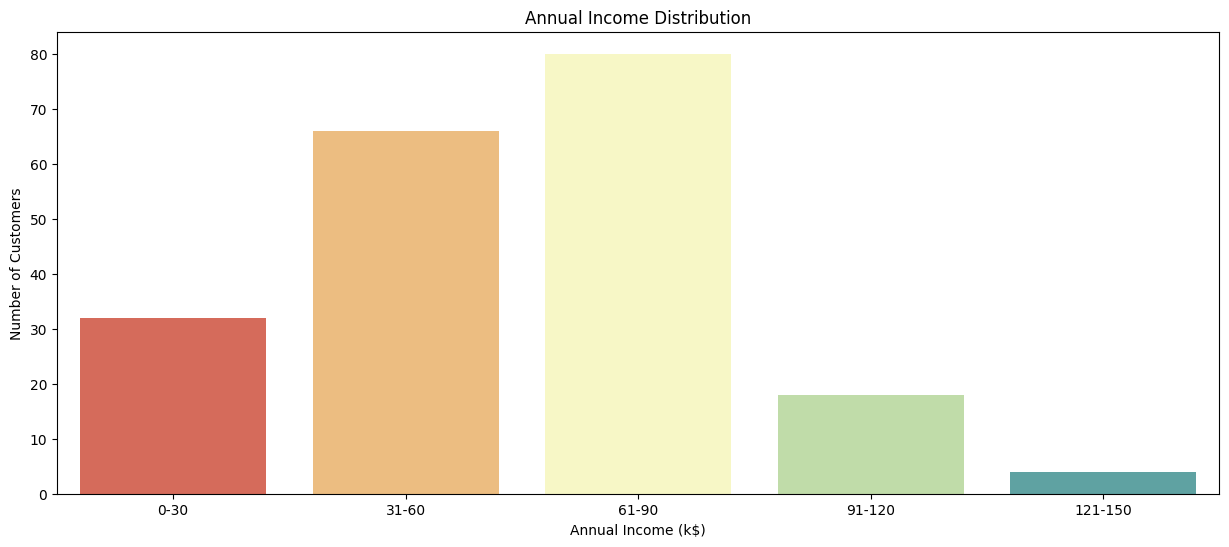

In [53]:
# visualize the distribution of customers across annual income ranges using a bar chart

# Defining the annual income ranges
ai_0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai_31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai_61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai_91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai_121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Labels and counts
aix = ["0-30", "31-60", "61-90", "91-120", "121-150"]
aiy = [len(ai_0_30), len(ai_31_60), len(ai_61_90), len(ai_91_120), len(ai_121_150)]

# Plotting
plt.figure(figsize=(15, 6))
sbn.barplot(x=aix, y=aiy, palette="Spectral")

# Titles and labels
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customers")

# Show plot
plt.show()



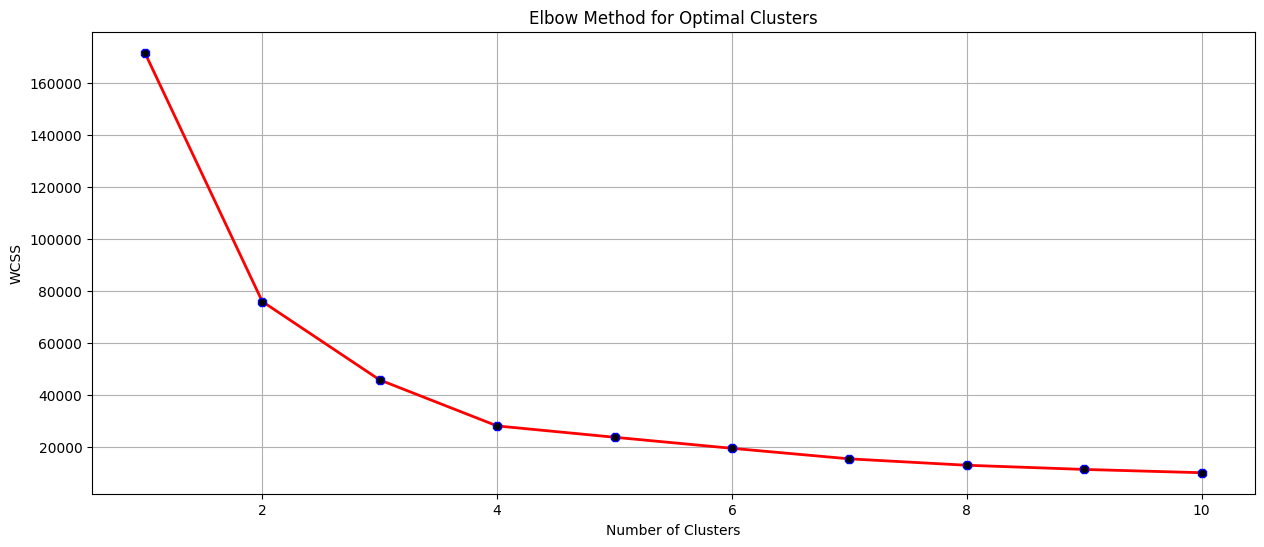

In [54]:
# Below code uses the Elbow Method to find the optimal number of clusters 
# for K-Means clustering using Age and Spending Score data.

# importing Kmeans clustering algorithm
from sklearn.cluster import KMeans

# select Age and Spending Score as Features
X1 = df[['Age','Spending Score (1-100)']].values

# List to store WCSS Values
wcss = []
# for loop --> Trying cluster counts from 1 to 10
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++', # Better centroid initialization
        n_init = 10, # Avoid Future Waring
        random_state = 42 # Reproducible Results    
    )
    
    kmeans.fit(X1) # Train KMaens Model
    wcss.append(kmeans.inertia_) # Save WCSS for current cluster count

plt.figure(figsize=(15,6)) # Creating Figure
plt.grid() # Show Gird Lines
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8', markerfacecolor='black', markeredgecolor='blue') # Plot clusters desgin

# Labels and Display
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")

plt.show()




In [55]:
# apply K-Means clustering to group data points into 4 clusters

kmeans = KMeans(n_clusters= 4) # create KMeans model with 4 clusters
label = kmeans.fit_predict(X1) # fit the model on data and assign cluster labels to each point
print(label) # print cluster labels for each data point


[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [56]:
# display the coordinates of each cluster's center

print(kmeans.cluster_centers_)

# print the centroid (mean point) of each cluster
# each row represents one cluster center
# each column corresponds to a feature (Age, Spending Score)

# in output means:
# each row shows the mean Age and Spending Score of one cluster

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


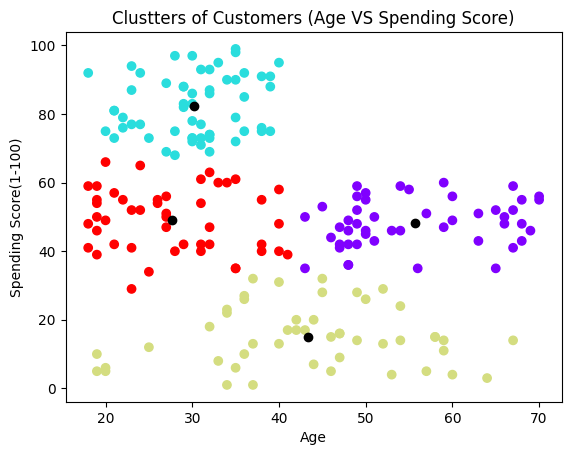

In [58]:
# visualize customer clusters and their centers using a scatter plot

# plot data points using Age (x-axis) and Spending Score (y-axis), colored by cluster labels
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
# plot cluster centers (centroids) in black
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')

# Labes and Display
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.title("Clustters of Customers (Age VS Spending Score)")

plt.show()



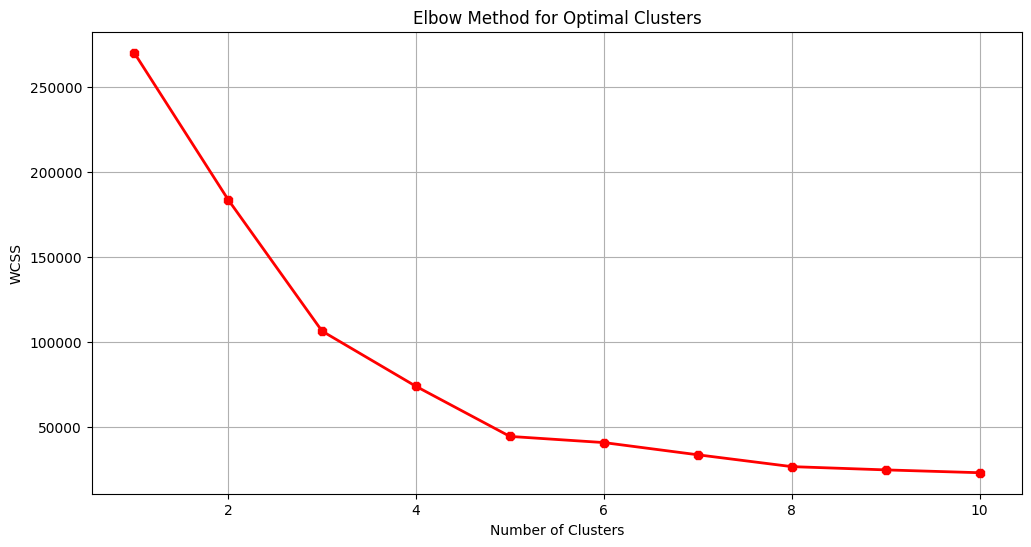

In [59]:
# find the optimal number of clusters using the Elbow Method

# import KMeans clustering algorithm
from sklearn.cluster import KMeans

# select income and spending score as clustering features
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
wcss = [] # list to store WCSS values for different cluster counts
for i in range(1, 11): # loop through cluster counts from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)     # create KMeans model with i clusters
    kmeans.fit(X2)  # fit KMeans model on the data
    wcss.append(kmeans.inertia_) # store within-cluster sum of squares
plt.figure(figsize=(12, 6)) # set figure size
plt.grid() # add grid to plot
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8") # plot WCSS vs number of clusters

# labels and show
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [60]:
# apply K-Means clustering with 5 clusters on the data
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X2)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [61]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]]


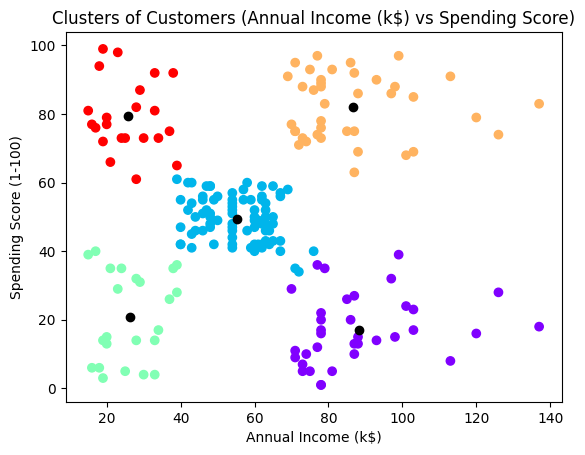

In [62]:
plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters of Customers (Annual Income (k$) vs Spending Score)")
plt.show()

In [63]:
# Ensure the imports and datasets is completely loaded to copy the file 

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder

# Ensure df is loaded
# df = pd.read_csv('S:\zenspaces\zen_python_for_data_science\Zen_Python_Projects_For_DS\Customer_Segmentation\data_sets\Mall_Customers.csv')

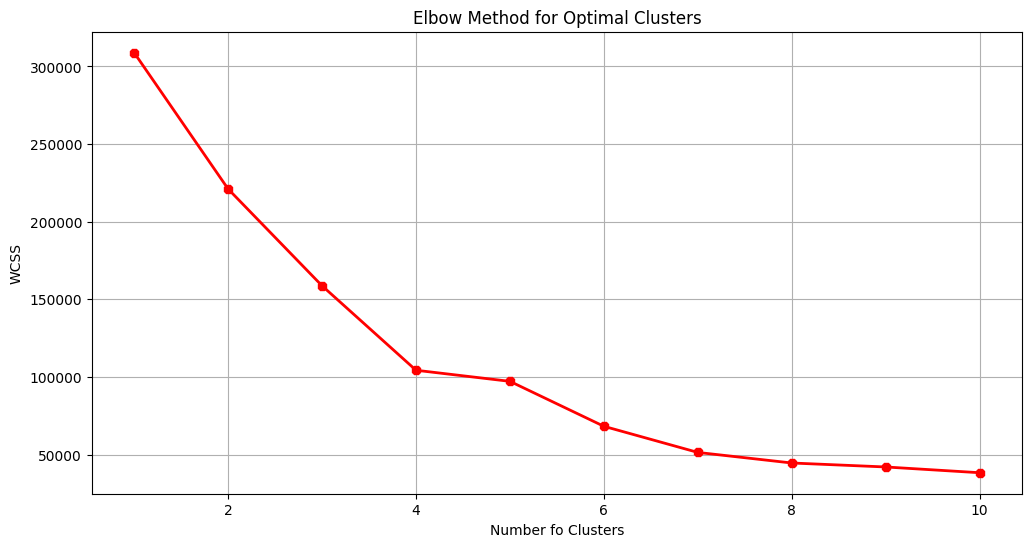

In [64]:
# prepare data, encode categorical columns, and find optimal clusters using the Elbow Method
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
df_encoded = df.copy() # cREATE A copy to avoid modifying the orginal data frame

# Identify the categorical columns
category_cols = df.select_dtypes(include=['object']).columns # Seldct text columns

# Encode Categorical Columns using LabelEncoder
for col in category_cols:
    lbe = LabelEncoder()
    df_encoded[col] = lbe.fit_transform(df[col])

# Selecting features for clustering (excluding the first column if needed)
X3 = df_encoded.iloc[:, 1:].values # Coverting DataFrame into numpy arrays

#Initialize empty list for WCSS
wcss = []

#compute WCSS for different numbers of clustters
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_) # Append WCSS Values

# Plot the Elbow Method Graph
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2, color='red', marker="8")
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number fo Clusters')
plt.ylabel('WCSS')

plt.show()


In [65]:
# apply K-Means clustering with 5 clusters on the dataset
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(X3)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 1 2 1 2 3 2 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
 2 1 2 2 2 1 1 1 1 2 1 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [66]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [53.71153846 54.42307692 48.73076923]
 [24.8        41.46       63.7       ]
 [44.14285714 25.14285714 19.52380952]
 [40.39473684 87.         18.63157895]]


In [67]:
## Ensure the imports and datasets is completely loaded to copy the file 

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from mpl_toolkits.mplot3d import Axes3D


# Ensure df is loaded
# df = pd.read_csv('S:\zenspaces\zen_python_for_data_science\Zen_Python_Projects_For_DS\Customer_Segmentation\data_sets\Mall_Customers.csv')

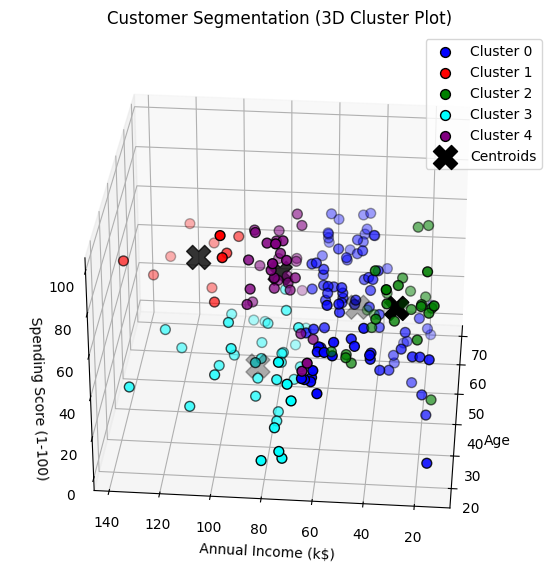

In [68]:
# apply K-Means clustering on three features and visualize clusters in 3D


# Ensure df is loaded
# df = pd.read_csv('S:\zenspaces\zen_python_for_data_science\Zen_Python_Projects_For_DS\Customer_Segmentation\data_sets\Mall_Customers.csv')

# Slecting Features
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply cluster KMeans Clustering
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
clusters = kmeans.fit_predict(X3)

# Assign cluster labels to the dataframe
df["label"] = clusters

# Create 3D scatter plot
fig = plt.figure(figsize= (12,7))
ax = fig.add_subplot(111,projection='3d')

# define colors for each clusters
colours = ['blue','red','green','cyan','purple']

# Plot for each clusters
for i in range(5):  # Assuming 5 clusters
    ax.scatter(df.Age[df.label == i],
               df["Annual Income (k$)"][df.label == i],
               df["Spending Score (1-100)"][df.label == i],
               c= colours[i], label=f'Cluster {i}', s=50, edgecolors='black')
               
# Scatter plot for centroids
ax.scatter(kmeans.cluster_centers_[:, 0],
           kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2],
           s=300, c='black', marker='X', label="Centroids")  # Centroid markers

# Labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Customer Segmentation (3D Cluster Plot)")
ax.legend()

# Set viewing angle
ax.view_init(30, 185)

plt.show()


In [70]:
print("End of the Customer's Segmentation project")

End of the Customer's Segmentation project
